## Microinteractions
### Computational pipeline for fitting linear regression model for interaction coefficients inference.

The pre-release version of this pipeline assumes the data to be in a very specific format.
Please contact [alex@gavruskin.com](mailto:alex@gavruskin.com) if you wish to give it a try.

#### Instructions for people working on this project
- Clone this repository `git clone https://github.com/gavruskin/microinteractions.git`
- `cd microinteractions`
- Put the data files in this folder
- Make sure that read-out columns are called `total_CFUs`, `DailyFecundity`, `Development`, `Survival`
- `python data_preprocess_total_CFUs.py`
- `python data_preprocess_DailyFecundity.py`
- `python data_preprocess_Development.py`
- `python data_preprocess_Survival.py`
- `jupyter notebook`
- Run all cells

Load dependencies:

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
import sys

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("png", "pdf", "svg")

matplotlib.style.use('ggplot')
%matplotlib inline

#### total_CFUs:
- Read the data and fit the model

In [2]:
data_total_CFUs = pd.read_csv("flygut_cfus_2017-10-31_expts1345_totals_processed.csv")

lm_total_CFUs = smf.ols(formula="total_CFUs ~ a + a1 + a2 + a3 + a4 + a5 +"
                     "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
                     "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
                     "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data_total_CFUs).fit()

- Output summary statistics

In [3]:
lm_total_CFUs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_CFUs   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     14.26
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           6.22e-64
Time:                        15:46:21   Log-Likelihood:                -21798.
No. Observations:                1536   AIC:                         4.366e+04
Df Residuals:                    1504   BIC:                         4.383e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -3.671e+17   1.62e+18     -0.226      0.821     -3.55e+18  2.81e+18
a           3.671e+17   1.62e+18      0.226      0.821     -2.81e+18  3.55e+18
a1          2.314e+05   7.31e+04      3.164      0.002      8.79e+04  3.75e+05
a2          4.755e+05   7.27e+04      6.542      0.000      3.33e+05  6.18e+05
a3          9.634e+04   7.27e+04      1.325      0.185     -4.62e+04  2.39e+05
a4          3.065e+05   7.27e+04      4.216      0.000      1.64e+05  4.49e+05
a5          2.792e+05   7.27e+04      3.841      0.000      1.37e+05  4.22e+05
b12         2.926e+05   1.03e+05      2.839      0.005      9.04e+04  4.95e+05
b13        -2.812e+05   1.03e+05     -2.728      0.006     -4.83e+05  -7.9e+04
b14         5.672e+04   1.03e+05      0.550      0.582     -1.45e+05  2.59e+05
b15        -4.055e+04   1.03e+05     -0.394      0.694     -2.43e+05  1.62e+05
b23        -5.053e+04   1.03e+05     -0.492      0.623     -2.52e+05  1.51e+05
b24         1.277e+05   1.03e+05      1.242      0.214     -7.39e+04  3.29e+05
b25         8.356e+04   1.03e+05      0.813      0.416     -1.18e+05  2.85e+05
b34         1.431e+05   1.03e+05      1.392      0.164     -5.85e+04  3.45e+05
b35         1.395e+05   1.03e+05      1.357      0.175     -6.21e+04  3.41e+05
b45         2.535e+05   1.03e+05      2.466      0.014      5.18e+04  4.55e+05
c123       -2.805e+05   1.46e+05     -1.927      0.054     -5.66e+05  5055.740
c124       -7.984e+04   1.46e+05     -0.548      0.583     -3.65e+05  2.06e+05
c125       -4.189e+04   1.46e+05     -0.288      0.774     -3.27e+05  2.44e+05
c134       -1.644e+05   1.46e+05     -1.129      0.259      -4.5e+05  1.21e+05
c135        -2.54e+05   1.46e+05     -1.745      0.081      -5.4e+05  3.15e+04
c145        1.531e+05   1.46e+05      1.052      0.293     -1.32e+05  4.39e+05
c234       -1.552e+05   1.45e+05     -1.067      0.286      -4.4e+05   1.3e+05
c235        7803.7063   1.45e+05      0.054      0.957     -2.77e+05  2.93e+05
c245         8.12e+04   1.45e+05      0.559      0.577     -2.04e+05  3.66e+05
c345        1.537e+05   1.45e+05      1.057      0.290     -1.31e+05  4.39e+05
d1234      -5.267e+05   2.06e+05     -2.560      0.011      -9.3e+05 -1.23e+05
d1235      -2.693e+05   2.06e+05     -1.309      0.191     -6.73e+05  1.34e+05
d1245       -1.06e+05   2.06e+05     -0.515      0.606      -5.1e+05  2.98e+05
d1345       2.304e+04   2.06e+05      0.112      0.911     -3.81e+05  4.27e+05
d2345      -1.294e+05   2.06e+05     -0.629      0.529     -5.33e+05  2.74e+05
e12345     -3.744e+05   2.91e+05     -1.287      0.198     -9.45e+05  1.96e+05
==============================================================================
Omnibus:                      420.148   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1383.330
Sk

- Plot inferred coefficients with confidence intervals

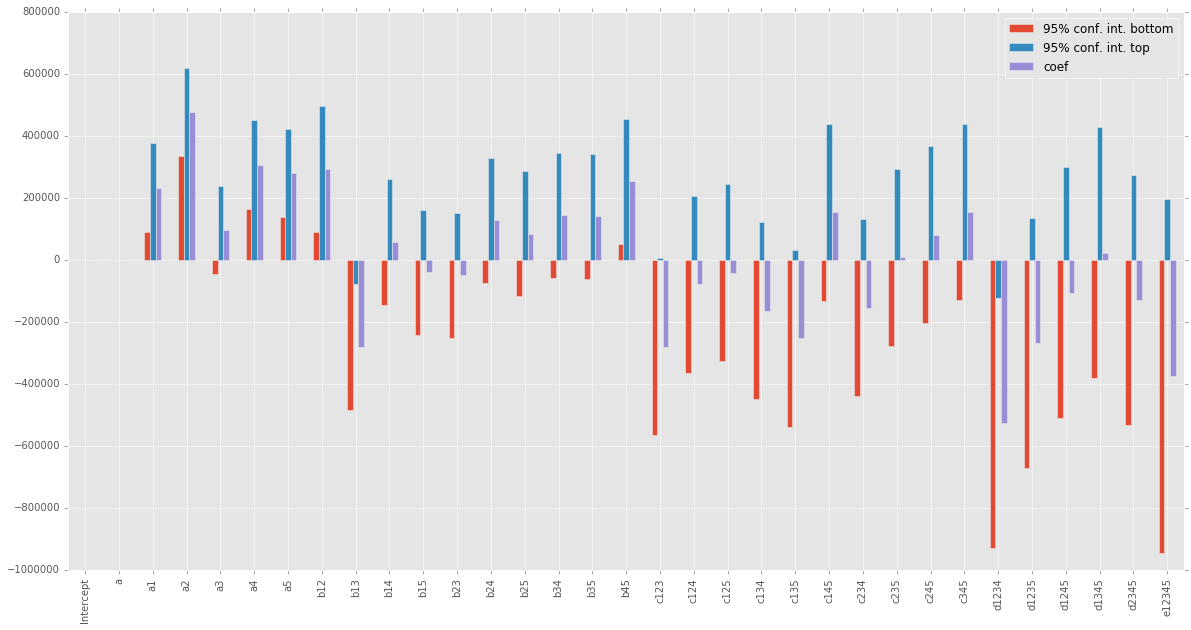

In [4]:
conf_int_total_CFUs = pd.DataFrame(lm_total_CFUs.conf_int())
conf_int_total_CFUs[2] = [lm_total_CFUs.params.a,
                            lm_total_CFUs.params.a,
                            lm_total_CFUs.params.a1,
                            lm_total_CFUs.params.a2,
                            lm_total_CFUs.params.a3,
                            lm_total_CFUs.params.a4,
                            lm_total_CFUs.params.a5,
                            lm_total_CFUs.params.b12,
                            lm_total_CFUs.params.b13,
                            lm_total_CFUs.params.b14,
                            lm_total_CFUs.params.b15,
                            lm_total_CFUs.params.b23,
                            lm_total_CFUs.params.b24,
                            lm_total_CFUs.params.b25,
                            lm_total_CFUs.params.b34,
                            lm_total_CFUs.params.b35,
                            lm_total_CFUs.params.b45,
                            lm_total_CFUs.params.c123,
                            lm_total_CFUs.params.c124,
                            lm_total_CFUs.params.c125,
                            lm_total_CFUs.params.c134,
                            lm_total_CFUs.params.c135,
                            lm_total_CFUs.params.c145,
                            lm_total_CFUs.params.c234,
                            lm_total_CFUs.params.c235,
                            lm_total_CFUs.params.c245,
                            lm_total_CFUs.params.c345,
                            lm_total_CFUs.params.d1234,
                            lm_total_CFUs.params.d1235,
                            lm_total_CFUs.params.d1245,
                            lm_total_CFUs.params.d1345,
                            lm_total_CFUs.params.d2345,
                            lm_total_CFUs.params.e12345]
conf_int_total_CFUs.columns = ["95% conf. int. bottom", "95% conf. int. top", "coef"]
# Set Intercept and a to 0, as otherwise the rest of the plot vanishes.
conf_int_total_CFUs["coef"].Intercept = 0
conf_int_total_CFUs["95% conf. int. bottom"].Intercept = 0
conf_int_total_CFUs["95% conf. int. top"].Intercept = 0
conf_int_total_CFUs["coef"].a = 0
conf_int_total_CFUs["95% conf. int. bottom"].a = 0
conf_int_total_CFUs["95% conf. int. top"].a = 0
conf_int_total_CFUs.plot.bar(figsize=(20,10))


#### DailyFecundity:
- Read the data and fit the model

In [5]:
data_DailyFecundity = pd.read_csv("DailyFecundityData_processed.csv")

lm_DailyFecundity = smf.ols(formula="DailyFecundity ~ a + a1 + a2 + a3 + a4 + a5 +"
                     "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
                     "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
                     "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data_DailyFecundity).fit()

- Output summary statistics

In [6]:
lm_DailyFecundity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         DailyFecundity   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     3.622
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           8.80e-11
Time:                        15:46:22   Log-Likelihood:                -4709.2
No. Observations:                2054   AIC:                             9482.
Df Residuals:                    2022   BIC:                             9662.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   8.971e+12   4.56e+12      1.969      0.049      3.55e+10  1.79e+13
a          -8.971e+12   4.56e+12     -1.969      0.049     -1.79e+13 -3.55e+10
a1            -0.7626      0.451     -1.692      0.091        -1.647     0.122
a2            -0.9675      0.474     -2.043      0.041        -1.896    -0.039
a3             0.6763      0.449      1.505      0.132        -0.205     1.557
a4             1.2339      0.449      2.746      0.006         0.353     2.115
a5             1.4565      0.449      3.242      0.001         0.575     2.338
b12            1.2609      0.636      1.981      0.048         0.013     2.509
b13            1.2252      0.619      1.981      0.048         0.012     2.438
b14            0.2458      0.619      0.397      0.691        -0.967     1.459
b15            0.5812      0.619      0.939      0.348        -0.632     1.794
b23            0.5467      0.635      0.860      0.390        -0.699     1.793
b24           -0.5779      0.635     -0.910      0.363        -1.824     0.668
b25            0.7384      0.635      1.162      0.245        -0.508     1.984
b34           -1.4007      0.617     -2.268      0.023        -2.612    -0.190
b35           -1.4379      0.617     -2.329      0.020        -2.649    -0.227
b45           -1.4129      0.617     -2.288      0.022        -2.624    -0.202
c123          -1.8029      0.874     -2.063      0.039        -3.517    -0.089
c124           0.5771      0.874      0.660      0.509        -1.137     2.291
c125          -1.7199      0.874     -1.968      0.049        -3.434    -0.006
c134          -0.2180      0.861     -0.253      0.800        -1.907     1.471
c135          -1.5618      0.861     -1.814      0.070        -3.251     0.127
c145          -0.3455      0.861     -0.401      0.688        -2.034     1.343
c234           1.1538      0.873      1.321      0.187        -0.559     2.866
c235          -0.4012      0.873     -0.459      0.646        -2.114     1.311
c245           0.5115      0.873      0.586      0.558        -1.201     2.224
c345           1.6105      0.860      1.872      0.061        -0.077     3.298
d1234         -0.6647      1.217     -0.546      0.585        -3.052     1.722
d1235          2.6005      1.217      2.136      0.033         0.213     4.988
d1245          0.4978      1.217      0.409      0.683        -1.889     2.885
d1345          0.7939      1.208      0.657      0.511        -1.575     3.163
d2345         -1.0023      1.217     -0.824      0.410        -3.388     1.384
e12345        -1.0212      1.708     -0.598      0.550        -4.371     2.328
==============================================================================
Omnibus:                       92.409   Durbin-Watson:                   0.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.910
Sk

- Plot inferred coefficients with confidence intervals

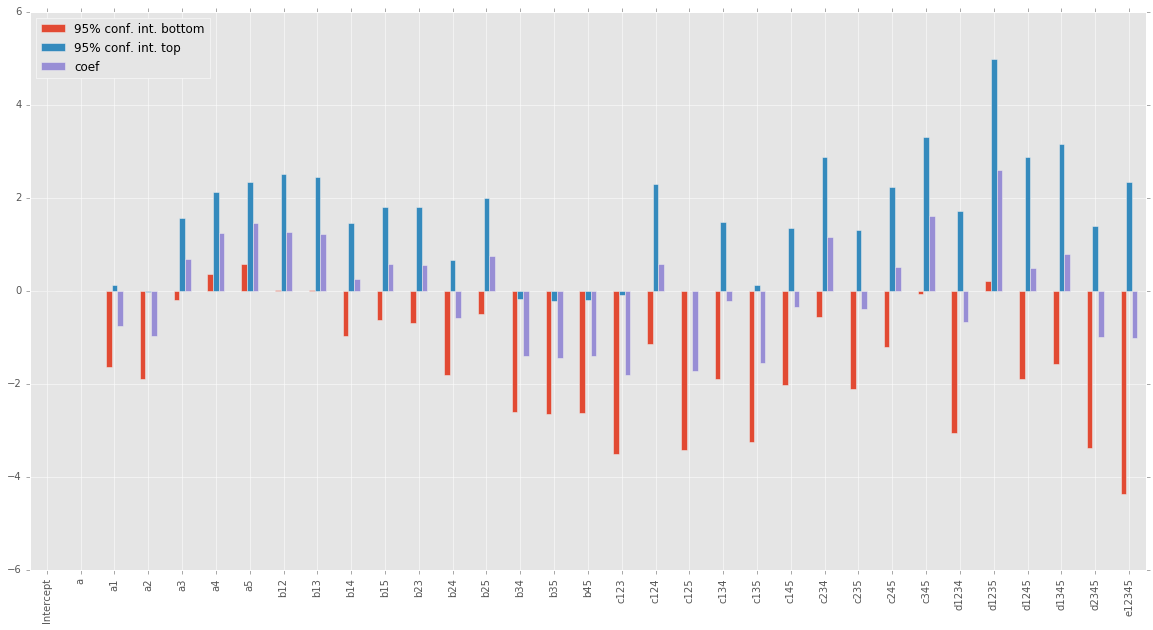

In [7]:
conf_int_DailyFecundity = pd.DataFrame(lm_DailyFecundity.conf_int())
conf_int_DailyFecundity[2] = [lm_DailyFecundity.params.a,
                            lm_DailyFecundity.params.a,
                            lm_DailyFecundity.params.a1,
                            lm_DailyFecundity.params.a2,
                            lm_DailyFecundity.params.a3,
                            lm_DailyFecundity.params.a4,
                            lm_DailyFecundity.params.a5,
                            lm_DailyFecundity.params.b12,
                            lm_DailyFecundity.params.b13,
                            lm_DailyFecundity.params.b14,
                            lm_DailyFecundity.params.b15,
                            lm_DailyFecundity.params.b23,
                            lm_DailyFecundity.params.b24,
                            lm_DailyFecundity.params.b25,
                            lm_DailyFecundity.params.b34,
                            lm_DailyFecundity.params.b35,
                            lm_DailyFecundity.params.b45,
                            lm_DailyFecundity.params.c123,
                            lm_DailyFecundity.params.c124,
                            lm_DailyFecundity.params.c125,
                            lm_DailyFecundity.params.c134,
                            lm_DailyFecundity.params.c135,
                            lm_DailyFecundity.params.c145,
                            lm_DailyFecundity.params.c234,
                            lm_DailyFecundity.params.c235,
                            lm_DailyFecundity.params.c245,
                            lm_DailyFecundity.params.c345,
                            lm_DailyFecundity.params.d1234,
                            lm_DailyFecundity.params.d1235,
                            lm_DailyFecundity.params.d1245,
                            lm_DailyFecundity.params.d1345,
                            lm_DailyFecundity.params.d2345,
                            lm_DailyFecundity.params.e12345]
conf_int_DailyFecundity.columns = ["95% conf. int. bottom", "95% conf. int. top", "coef"]
# Set Intercept and a to 0, as otherwise the rest of the plot vanishes.
conf_int_DailyFecundity["coef"].Intercept = 0
conf_int_DailyFecundity["95% conf. int. bottom"].Intercept = 0
conf_int_DailyFecundity["95% conf. int. top"].Intercept = 0
conf_int_DailyFecundity["coef"].a = 0
conf_int_DailyFecundity["95% conf. int. bottom"].a = 0
conf_int_DailyFecundity["95% conf. int. top"].a = 0
conf_int_DailyFecundity.plot.bar(figsize=(20,10))

#### Development:
- Read the data and fit the model

In [8]:
data_Development = pd.read_csv("DevelopmentData_processed.csv")

lm_Development = smf.ols(formula="Development ~ a + a1 + a2 + a3 + a4 + a5 +"
                     "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
                     "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
                     "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data_Development).fit()

- Output summary statistics

In [9]:
lm_Development.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Development   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     6.265
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           3.94e-22
Time:                        15:46:23   Log-Likelihood:                -719.38
No. Observations:                 766   AIC:                             1503.
Df Residuals:                     734   BIC:                             1651.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.2273      0.067     77.558      0.000         5.095     5.360
a              5.2273      0.067     77.558      0.000         5.095     5.360
a1             0.7121      0.187      3.816      0.000         0.346     1.078
a2            -0.3295      0.187     -1.766      0.078        -0.696     0.037
a3             0.0871      0.187      0.467      0.641        -0.279     0.453
a4             0.0038      0.187      0.020      0.984        -0.363     0.370
a5            -0.5795      0.187     -3.106      0.002        -0.946    -0.213
b12           -0.6705      0.261     -2.568      0.010        -1.183    -0.158
b13           -0.7121      0.261     -2.728      0.007        -1.225    -0.200
b14           -0.7955      0.261     -3.047      0.002        -1.308    -0.283
b15           -0.7538      0.261     -2.888      0.004        -1.266    -0.241
b23           -0.3371      0.261     -1.291      0.197        -0.850     0.175
b24            0.1629      0.261      0.624      0.533        -0.350     0.675
b25            0.0795      0.261      0.305      0.761        -0.433     0.592
b34           -0.4205      0.261     -1.611      0.108        -0.933     0.092
b35           -0.0038      0.261     -0.015      0.988        -0.516     0.509
b45           -0.0871      0.261     -0.334      0.739        -0.600     0.425
c123           0.6288      0.367      1.713      0.087        -0.092     1.349
c124           0.6288      0.367      1.713      0.087        -0.092     1.349
c125           0.9621      0.367      2.621      0.009         0.241     1.683
c134           0.9205      0.367      2.507      0.012         0.200     1.641
c135           0.9205      0.367      2.507      0.012         0.200     1.641
c145           0.8788      0.367      2.394      0.017         0.158     1.599
c234           0.2955      0.367      0.805      0.421        -0.425     1.016
c235           0.2121      0.367      0.578      0.564        -0.509     0.933
c245           0.2538      0.367      0.691      0.490        -0.467     0.974
c345           0.5871      0.367      1.599      0.110        -0.134     1.308
d1234         -0.6288      0.518     -1.215      0.225        -1.645     0.388
d1235         -0.9621      0.518     -1.858      0.064        -1.978     0.054
d1245         -1.1288      0.518     -2.180      0.030        -2.145    -0.112
d1345         -1.3371      0.518     -2.583      0.010        -2.353    -0.321
d2345         -0.3371      0.518     -0.651      0.515        -1.353     0.679
e12345         1.4205      0.731      1.943      0.052        -0.015     2.856
==============================================================================
Omnibus:                       11.991   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.099
Sk

- Plot inferred coefficients with confidence intervals

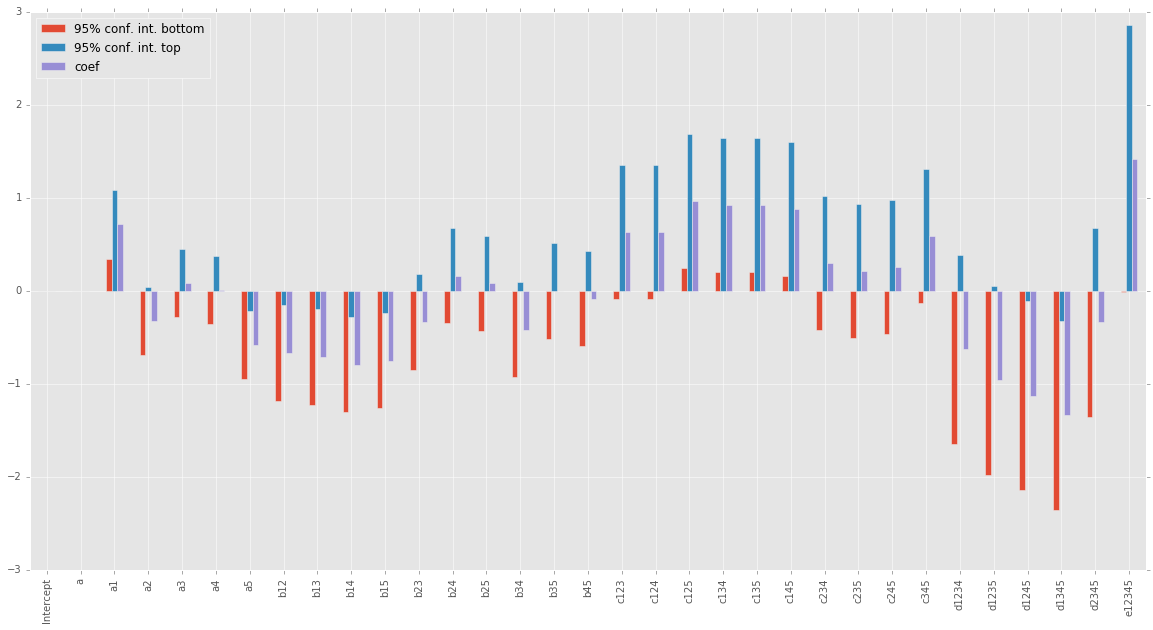

In [10]:
conf_int_Development = pd.DataFrame(lm_Development.conf_int())
conf_int_Development[2] = [lm_Development.params.a,
                            lm_Development.params.a,
                            lm_Development.params.a1,
                            lm_Development.params.a2,
                            lm_Development.params.a3,
                            lm_Development.params.a4,
                            lm_Development.params.a5,
                            lm_Development.params.b12,
                            lm_Development.params.b13,
                            lm_Development.params.b14,
                            lm_Development.params.b15,
                            lm_Development.params.b23,
                            lm_Development.params.b24,
                            lm_Development.params.b25,
                            lm_Development.params.b34,
                            lm_Development.params.b35,
                            lm_Development.params.b45,
                            lm_Development.params.c123,
                            lm_Development.params.c124,
                            lm_Development.params.c125,
                            lm_Development.params.c134,
                            lm_Development.params.c135,
                            lm_Development.params.c145,
                            lm_Development.params.c234,
                            lm_Development.params.c235,
                            lm_Development.params.c245,
                            lm_Development.params.c345,
                            lm_Development.params.d1234,
                            lm_Development.params.d1235,
                            lm_Development.params.d1245,
                            lm_Development.params.d1345,
                            lm_Development.params.d2345,
                            lm_Development.params.e12345]
conf_int_Development.columns = ["95% conf. int. bottom", "95% conf. int. top", "coef"]
# Comment all the following lines out to plot the Intercept and a.
conf_int_Development["coef"].Intercept = 0
conf_int_Development["95% conf. int. bottom"].Intercept = 0
conf_int_Development["95% conf. int. top"].Intercept = 0
conf_int_Development["coef"].a = 0
conf_int_Development["95% conf. int. bottom"].a = 0
conf_int_Development["95% conf. int. top"].a = 0
conf_int_Development.plot.bar(figsize=(20,10))

#### Survival:
- Read the data and fit the model

In [11]:
data_Survival = pd.read_csv("SurvivalData_processed.csv")

lm_Survival = smf.ols(formula="Survival ~ a + a1 + a2 + a3 + a4 + a5 +"
                     "b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + b35 + b45 +"
                     "c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 +"
                     "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data_Survival).fit()

- Output summary statistics

In [12]:
lm_Survival.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survival   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     7.049
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           6.81e-29
Time:                        15:46:24   Log-Likelihood:                -12325.
No. Observations:                3163   AIC:                         2.471e+04
Df Residuals:                    3131   BIC:                         2.491e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     26.6250      0.669     39.771      0.000        25.312    27.938
a             26.6250      0.669     39.771      0.000        25.312    27.938
a1            -6.6000      1.796     -3.674      0.000       -10.122    -3.078
a2            -1.0750      1.894     -0.568      0.570        -4.788     2.638
a3            -0.7206      1.789     -0.403      0.687        -4.227     2.786
a4            -4.9500      1.796     -2.756      0.006        -8.472    -1.428
a5           -10.0900      1.796     -5.617      0.000       -13.612    -6.568
b12            5.2350      2.540      2.061      0.039         0.254    10.216
b13            3.0506      2.463      1.238      0.216        -1.779     7.880
b14            6.0900      2.469      2.467      0.014         1.249    10.931
b15            6.9200      2.469      2.803      0.005         2.079    11.761
b23           -1.2244      2.535     -0.483      0.629        -6.195     3.746
b24           -0.4350      2.540     -0.171      0.864        -5.416     4.546
b25            4.7050      2.540      1.852      0.064        -0.276     9.686
b34            2.4106      2.463      0.979      0.328        -2.419     7.240
b35            7.6706      2.463      3.114      0.002         2.841    12.500
b45            5.3200      2.469      2.155      0.031         0.479    10.161
c123          -2.5656      3.487     -0.736      0.462        -9.404     4.272
c124          -8.1450      3.491     -2.333      0.020       -14.991    -1.299
c125          -8.8995      3.489     -2.550      0.011       -15.741    -2.058
c134          -4.6406      3.436     -1.351      0.177       -11.377     2.096
c135          -7.1506      3.436     -2.081      0.037       -13.887    -0.414
c145          -9.2300      3.440     -2.683      0.007       -15.974    -2.486
c234          -1.7256      3.487     -0.495      0.621        -8.564     5.112
c235          -6.4656      3.487     -1.854      0.064       -13.304     0.372
c245          -1.7550      3.491     -0.503      0.615        -8.601     5.091
c345          -3.1706      3.436     -0.923      0.356        -9.907     3.566
d1234          7.5156      4.862      1.546      0.122        -2.017    17.048
d1235         12.2300      4.860      2.516      0.012         2.701    21.760
d1245         11.9395      4.863      2.455      0.014         2.404    21.475
d1345          7.9906      4.825      1.656      0.098        -1.469    17.450
d2345          1.3956      4.862      0.287      0.774        -8.137    10.928
e12345       -13.4300      6.824     -1.968      0.049       -26.810    -0.050
==============================================================================
Omnibus:                      204.087   Durbin-Watson:                   0.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.223
Sk

- Plot inferred coefficients with confidence intervals

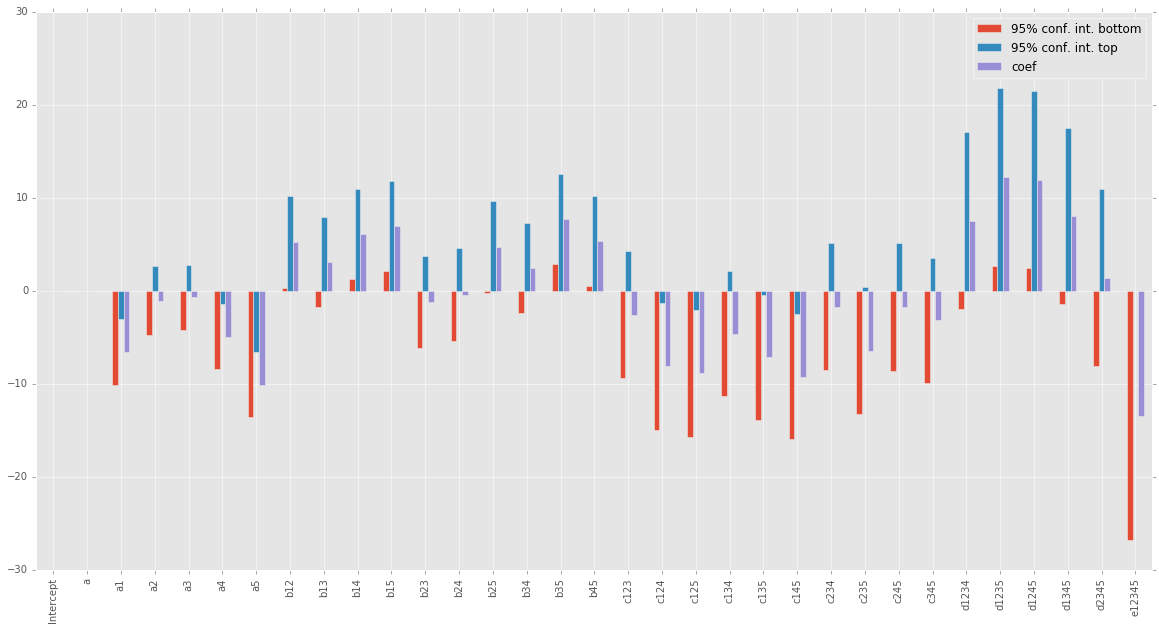

In [13]:
conf_int_Survival = pd.DataFrame(lm_Survival.conf_int())
conf_int_Survival[2] = [lm_Survival.params.a,
                            lm_Survival.params.a,
                            lm_Survival.params.a1,
                            lm_Survival.params.a2,
                            lm_Survival.params.a3,
                            lm_Survival.params.a4,
                            lm_Survival.params.a5,
                            lm_Survival.params.b12,
                            lm_Survival.params.b13,
                            lm_Survival.params.b14,
                            lm_Survival.params.b15,
                            lm_Survival.params.b23,
                            lm_Survival.params.b24,
                            lm_Survival.params.b25,
                            lm_Survival.params.b34,
                            lm_Survival.params.b35,
                            lm_Survival.params.b45,
                            lm_Survival.params.c123,
                            lm_Survival.params.c124,
                            lm_Survival.params.c125,
                            lm_Survival.params.c134,
                            lm_Survival.params.c135,
                            lm_Survival.params.c145,
                            lm_Survival.params.c234,
                            lm_Survival.params.c235,
                            lm_Survival.params.c245,
                            lm_Survival.params.c345,
                            lm_Survival.params.d1234,
                            lm_Survival.params.d1235,
                            lm_Survival.params.d1245,
                            lm_Survival.params.d1345,
                            lm_Survival.params.d2345,
                            lm_Survival.params.e12345]
conf_int_Survival.columns = ["95% conf. int. bottom", "95% conf. int. top", "coef"]
# Comment all the following lines out to plot the Intercept and a.
conf_int_Survival["coef"].Intercept = 0
conf_int_Survival["95% conf. int. bottom"].Intercept = 0
conf_int_Survival["95% conf. int. top"].Intercept = 0
conf_int_Survival["coef"].a = 0
conf_int_Survival["95% conf. int. bottom"].a = 0
conf_int_Survival["95% conf. int. top"].a = 0
conf_int_Survival.plot.bar(figsize=(20,10))